In [ ]:
# clear the python workspace
%reset -sf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

Based on the "Master statistics and machine learning: Intuition, Math, code"
by Mike X Cohen, sincxpress.com

### Simple regression

#### The following table represents the survey results from the 7 online
##### data from http://www.intellspot.com/linear-regression-examples/



In [2]:
# example: relationship between the monthly e-commerce sales and the online advertising costs.
montlyEcommSales = [368, 340, 665, 954, 331, 556, 376 ] # (in 1000 s)
dollars = [1.7, 1.5, 2.8, 5, 1.3, 2.2, 1.3] # Dollars (1000 s)

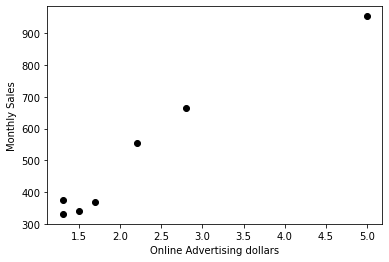

In [3]:
# showing the data
plt.plot(dollars, montlyEcommSales,'ko', markerfacecolor='k' )
plt.xlabel('Online Advertising dollars')
plt.ylabel('Monthly Sales')
plt.show()

#### "Manual" regression via least-squares fitting

In [4]:
# create the design matrix
desmat = np.vstack((np.ones(7), dollars)).T
print(desmat)

[[1.  1.7]
 [1.  1.5]
 [1.  2.8]
 [1.  5. ]
 [1.  1.3]
 [1.  2.2]
 [1.  1.3]]


In [5]:
# compute the beta parameters (regression coefficients)
beta = np.linalg.lstsq(desmat, montlyEcommSales, rcond=None)[0]
print(beta)

[125.83486985 171.46556399]


In [6]:
# predicted data values
y_Hat = desmat@beta

#### show the predicted results on top of the "real" data


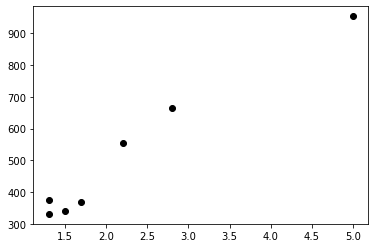

In [7]:
# show previous data
plt.plot(dollars, montlyEcommSales, 'ko', markerfacecolor='k')

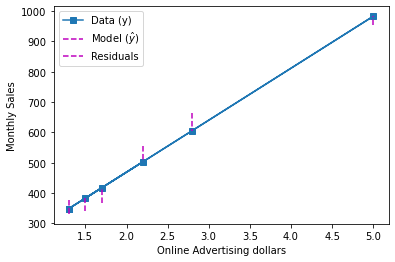

In [9]:
# predicted results
plt.plot(dollars, y_Hat, 's-')

# show the residuals
for i in range(7):
    plt.plot([dollars[i], dollars[i]], [montlyEcommSales[i], y_Hat[i]], 'm--')

plt.legend(('Data (y)','Model ($\^{y}$)','Residuals'))

plt.xlabel('Online Advertising dollars')
plt.ylabel('Monthly Sales')
plt.show()

In [10]:
## now with scipy

slope,intercept,r,p,std_err = stats.linregress(dollars, montlyEcommSales)
print(intercept,slope)
print(beta)

125.83486984815613 171.46556399132325
[125.83486985 171.46556399]


### Multiple regression

#### example: effects of sleep and study hours on exam scores

In [11]:
# create the data
exam_scores = []
for j in range(5):
    exam_scores = np.hstack((exam_scores, 60*np.ones(6)+np.linspace(-1, 5, 6)*j))
hours_studied = np.tile(np.linspace(2, 8, 6), 5)
ave_sleep_hrs = np.linspace(6, 10, 30)

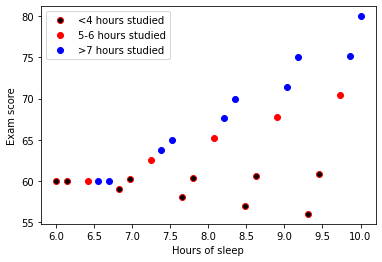

In [12]:
# stratify by hours studied

plotidx = hours_studied < 4.1
plt.plot(ave_sleep_hrs[plotidx], exam_scores[plotidx], 'ro', markerfacecolor='k')

# 5-6 hours studied
plotidx = np.logical_and(hours_studied>4.9, hours_studied<6.1)
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'ro',markerfacecolor='r')

# more than 6 hours
plotidx = hours_studied>6
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'bo',markerfacecolor='b')

plt.xlabel('Hours of sleep')
plt.ylabel('Exam score')
plt.legend(('<4 hours studied','5-6 hours studied','>7 hours studied'))
plt.show()

### multiple regression 

In [13]:
# build the design matrix
desmat = np.vstack((np.ones((30,)),ave_sleep_hrs,hours_studied,ave_sleep_hrs*hours_studied)).T

multireg = sm.OLS(endog=exam_scores, exog=desmat).fit()
multireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1182.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           6.74e-28
Time:                        10:15:45   Log-Likelihood:                -21.269
No. Observations:                  30   AIC:                             50.54
Df Residuals:                      26   BIC:                             56.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.4315      1.700     48.491      0.000      78.937      85.926
x1            -3.4511      0.215    -16.087      0.000      -3.892      -3.010
x2            -7.6663      0.321    -23.916      0.000      -8.325      -7.007
x3             1.1736      0.040     29.623      0.000       1.092       1.255
==============================================================================
Omnibus:                       10.899   Durbin-Watson:                   1.069
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                3.273
Skew:                          -0.438   Prob(JB):                        0.195
Kurtosis:                       1.640   Cond. No.                         821.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# without the interaction term

multireg = sm.OLS(endog=exam_scores, exog=desmat[:,0:-1]).fit()
multireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     39.86
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           8.76e-09
Time:                        10:15:49   Log-Likelihood:                -74.492
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      27   BIC:                             159.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0556      3.832      9.409      0.000      28.193      43.918
x1             2.4167      0.477      5.071      0.000       1.439       3.395
x2             1.7222      0.278      6.203      0.000       1.153       2.292
==============================================================================
Omnibus:                        0.189   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.004
Skew:                          -0.000   Prob(JB):                        0.998
Kurtosis:                       2.943   Cond. No.                         66.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# inspect the correlations of the IVs
np.corrcoef(desmat[:,1:].T)

array([[1.        , 0.19731231, 0.49270769],
       [0.19731231, 1.        , 0.94068915],
       [0.49270769, 0.94068915, 1.        ]])

### Polynomial regression

In [16]:
# generate the data
n = 30
x = np.linspace(-2, 4, n)
y1 = x**2 + np.random.randn(n)
y2 = x**3 + np.random.randn(n)

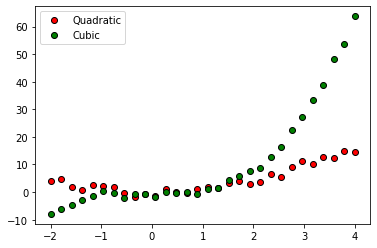

In [17]:
# plot the data
plt.plot(x, y1, 'ko', markerfacecolor='r')
plt.plot(x, y2, 'ko', markerfacecolor='g')
plt.legend(('Quadratic', 'Cubic'))
plt.show()

#### Polynomial fit

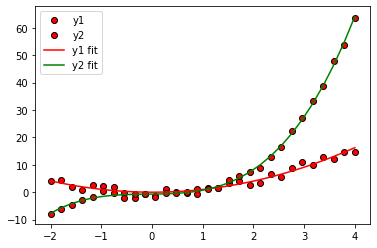

In [18]:
# for y1
pterms1 = np.polyfit(x, y1, 2)
y_hat1 = np.polyval(pterms1, x)

# for y2
pterms2 = np.polyfit(x, y2, 3)
y_hat2 = np.polyval(pterms2, x)

plt.plot(x, y1, 'ko', markerfacecolor='r', label='y1')
plt.plot(x, y2, 'ko', markerfacecolor='r', label='y2')

plt.plot(x, y_hat1, 'r', label='y1 fit')
plt.plot(x, y_hat2, 'g', label='y2 fit')
plt.legend()
plt.show()

#### Compute R2

In [19]:
# compute R2 for several polynomial orders
orders = np.arange(1,6)

#output matrices
r2 = np.zeros((2, len(orders)))
sse = np.zeros((2, len(orders)))

for i in range(len(orders)):
    pterms = np.polyfit(x, y1, orders[i])  # fit the model with i terms
    Y_hat = np.polyval(pterms, x)

    ssr = sum((y1 - Y_hat)**2)
    sst = sum((y1-np.mean(y1))**2)
    r2[0,i] = 1 - ssr/sst # R^2
    sse[0,i] = ssr # store just the SSe for model comparison later

    pterms_2 = np.polyfit(x, y2, orders[i])
    y_hat_2 = np.polyval(pterms_2, x)
    ssr2= sum((y2 - y_hat_2)**2)
    sst2 = np.var(y2)*(n -1)
    r2[1,i] = 1 - ssr2/sst2 
    sse[1,i] = ssr2 

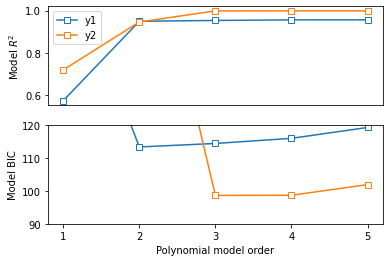

In [20]:
fig,ax = plt.subplots(2,1,figsize=(6,4))

# plot the R2 results
ax[0].plot(orders,r2[0,:],'s-',markerfacecolor='w')
ax[0].plot(orders,r2[1,:],'s-',markerfacecolor='w')
ax[0].set_ylabel('Model $R^2$')
ax[0].set_xticks([])
ax[0].legend(('y1','y2'))

# compute the Bayes Information Criterion
bic = n*np.log(sse) + orders*np.log(n)
ax[1].plot(orders,bic[0,:],'s-',markerfacecolor='w')
ax[1].plot(orders,bic[1,:],'s-',markerfacecolor='w')
ax[1].set_xlabel('Polynomial model order')
ax[1].set_xticks(range(1,6))
ax[1].set_ylabel('Model BIC')

# optional zoom
ax[1].set_ylim([90,120])

plt.show()

### Logistic regression

In [21]:
# generate the data

exam_outcome = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
study_hours  = [7.9, 7.9, 2.8, 5.4, 6.1, 4.5, 6.9, 2.3, 1.9, 1, 3.1, 5.7, 5.6, 4.7, 4.2, 2, 7.7, 6.5, 5.1, 3.7]
sleep_hours  = [4.4, 5.2, 7.5, 4.6, 5.5, 6.1, 6.6, 3.1, 5.9, 3.2, 7.5, 7.8, 6.1, 5.4, 10.5, 8.2, 7.2, 7.2, 5.9, 7.9]

n = len(exam_outcome)

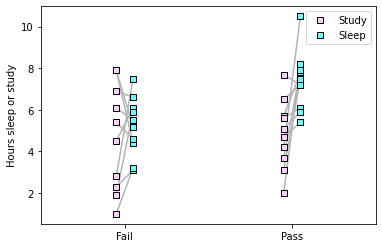

In [22]:
for i in range(n):
    plt.plot([exam_outcome[i] - .05, exam_outcome[i] + .05],[study_hours[i],sleep_hours[i]],color=[.7,.7,.7])

plt.plot(exam_outcome - .05*np.ones(n),study_hours,'ks',markerfacecolor=[1,.8,1],label='Study')
plt.plot(exam_outcome + .05*np.ones(n),sleep_hours,'ks',markerfacecolor=[.39,1,1],label='Sleep')

plt.xticks([0,1],labels=('Fail','Pass'))
plt.xlim([-.5,1.5])
plt.ylabel('Hours sleep or study')
plt.legend()
plt.show()

#### The logistic regression

In [23]:
# create a model
logregmodel = LogisticRegression(solver='liblinear')  #'newton-cg'

# create the desing matrix
desmat = np.vstack((study_hours, sleep_hours)).T
logregmodel.fit(desmat, np.array(exam_outcome))

print(logregmodel.intercept_)
print(logregmodel.coef_)

[-0.96510192]
[[-0.19445677  0.3361749 ]]


In [24]:
# compute predications and accuracy
predvals = logregmodel.predict(desmat) # class labels
predvalsP = logregmodel.predict_proba(desmat) # probability values

print(predvals)
print(np.array(exam_outcome))

print(predvalsP)

logregmodel.score(desmat, np.array(exam_outcome))

[0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[[0.7353894  0.2646106 ]
 [0.67987577 0.32012423]
 [0.26664125 0.73335875]
 [0.61509116 0.38490884]
 [0.5750111  0.4249889 ]
 [0.44756611 0.55243389]
 [0.52201059 0.47798941]
 [0.59150979 0.40849021]
 [0.343246   0.656754  ]
 [0.5209375  0.4790625 ]
 [0.27820281 0.72179719]
 [0.36617566 0.63382434]
 [0.50084824 0.49915176]
 [0.51592069 0.48407931]
 [0.1482976  0.8517024 ]
 [0.19740089 0.80259911]
 [0.51048841 0.48951159]
 [0.45229843 0.54770157]
 [0.49335028 0.50664972]
 [0.27464343 0.72535657]]


0.7

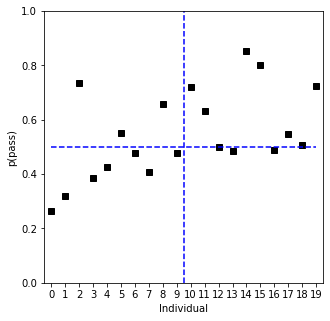

In [25]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(predvalsP[:,1],'ks')
ax.plot([0,19],[.5,.5],'b--')
ax.plot([9.5,9.5],[0,1],'b--')

ax.set_xticks(np.arange(20))
ax.set_xlabel('Individual')
ax.set_ylabel('p(pass)')
ax.set_xlim([-.5, 19.5])
ax.set_ylim([0,1])
plt.show()